In [104]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)


In [105]:
# Combine the data into a single dataset

df = pd.merge(mouse_df, trial_df, on = 'Mouse ID')
drug_list = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
df = df[df['Drug'].isin(drug_list)]

# Display the data table for preview
df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

In [107]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vol_grouped = df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
tumor_vol_df = pd.DataFrame(tumor_vol_grouped)
tumor_vol_df.reset_index(inplace = True)

# Preview DataFrame
tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [108]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
error_grouped = df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
error_grouped.head()

# Convert to DataFrame
error_df = pd.DataFrame(error_grouped)
error_df.reset_index(inplace = True)
error_df = error_df.rename(index = str, columns = {'Tumor Volume (mm3)': 'Tumor Volume Standard Error (mm3)'})
error_df.head()

,Drug,Timepoint,Tumor Volume Standard Error (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [109]:
# Minor Data Munging to Re-Format the Data Frames

tumor_vol_pivot = pd.pivot_table(tumor_vol_df, values = 'Tumor Volume (mm3)', index = ['Timepoint'], columns = ['Drug'])
error_pivot = pd.pivot_table(error_df, values = 'Tumor Volume Standard Error (mm3)', index = ['Timepoint'], columns = ['Drug'])

# Preview that Reformatting worked
tumor_vol_pivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [110]:
error_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


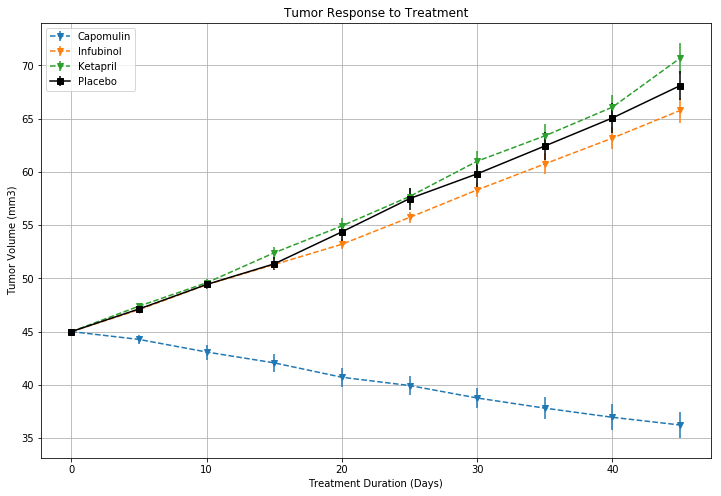

In [111]:
# Generate the Plot (with Error Bars)
timepoint = list(tumor_vol_pivot.index)

def plotter(xdata, ydata, errorlist, title, xlab, ylab, imagename):
    
    itemlist = list(ydata)
    plt.figure(figsize = [12, 8])

    for item in itemlist:
        if item == 'Placebo':
            plt.errorbar(xdata, ydata[item], yerr = list(errorlist[item]), color = 'k', marker = 's', label = item)
        else:
            plt.errorbar(xdata, ydata[item], yerr = list(errorlist[item]), linestyle = 'dashed', marker = 'v', label = item)

    plt.legend()
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid()

    # Save the Figure
    plt.savefig(imagename)

    plt.show()
    
plotter(timepoint, tumor_vol_pivot, error_pivot, title = 'Tumor Response to Treatment', 
       xlab = 'Treatment Duration (Days)', ylab = 'Tumor Volume (mm3)', imagename = 'images/tumor_response.jpg')

## Metastatic Response to Treatment

In [112]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_sites_grouped = df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
# error_grouped.head()

# Convert to DataFrame
meta_sites_df = pd.DataFrame(meta_sites_grouped)
meta_sites_df.reset_index(inplace = True)

# Preview DataFrame
meta_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [113]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
error2_grouped = df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
error2_grouped.head()
# Convert to DataFrame
error2_df = pd.DataFrame(error2_grouped)
error2_df.reset_index(inplace = True)
error2_df = error2_df.rename(index = str, columns = {'Metastatic Sites': 'Metastatic Sites Standard Error'})
error2_df.head()


,Drug,Timepoint,Metastatic Sites Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [114]:
# Minor Data Munging to Re-Format the Data Frames

meta_sites_pivot = pd.pivot_table(meta_sites_df, values = 'Metastatic Sites', index = ['Timepoint'], columns = ['Drug'])
error2_pivot = pd.pivot_table(error2_df, values = 'Metastatic Sites Standard Error', index = ['Timepoint'], columns = ['Drug'])

# Preview that Reformatting worked
# meta_sites_pivot.head()
error2_pivot.head()

# Preview that Reformatting worked


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


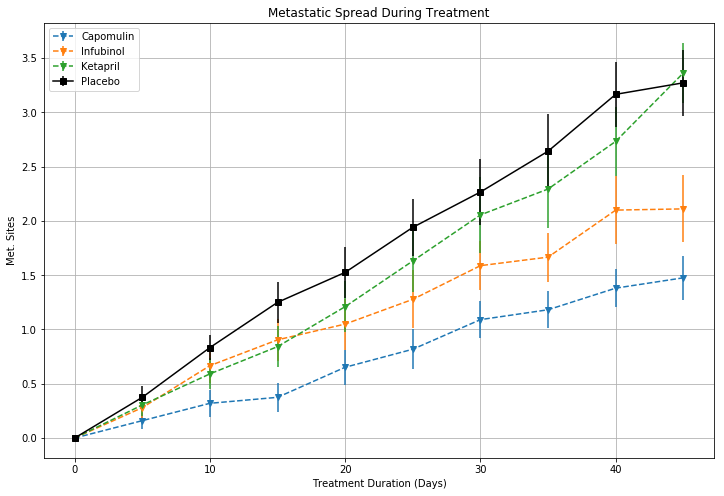

In [115]:
# Generate the Plot (with Error Bars)

plotter(timepoint, meta_sites_pivot, error2_pivot, title = 'Metastatic Spread During Treatment', 
       xlab = 'Treatment Duration (Days)', ylab = 'Met. Sites', imagename = 'images/metastatic_spread.jpg')

## Survival Rates

In [116]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_count_grouped = df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
mouse_count_grouped.head()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count_grouped)
mouse_count_df.reset_index(inplace=True)
mouse_count_df = mouse_count_df.rename(index = str, columns = {'Mouse ID': 'Mouse Count'})

# Preview dataframe
mouse_count_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [117]:
# Minor Data Munging to Re-Format the Data Frames

mouse_count_pivot = pd.pivot_table(mouse_count_df, values = 'Mouse Count', index = ['Timepoint'], columns = ['Drug'])

# Preview the Data Frame
mouse_count_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


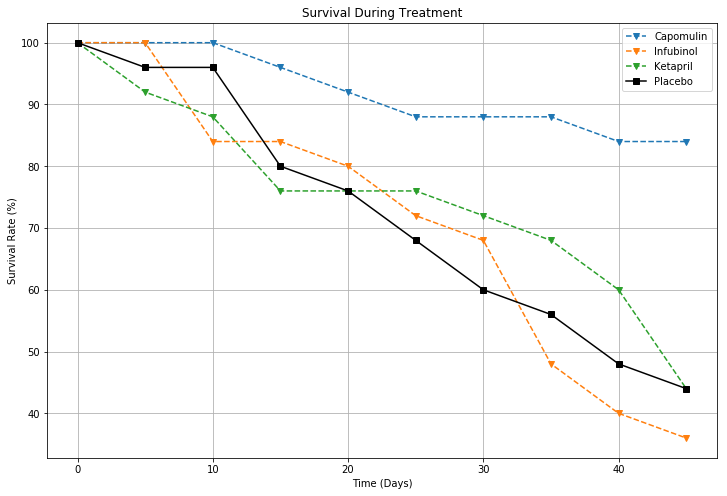

In [118]:
# Generate the Plot (Accounting for percentages)

drugs = list(mouse_count_pivot)
plt.figure(figsize = [12, 8])

for item in drugs:
    if item == 'Placebo':
        plt.plot(timepoint, (mouse_count_pivot[item]/mouse_count_pivot[item][0])*100, color = 'k', marker = 's', label = item)
    else:
        plt.plot(timepoint, (mouse_count_pivot[item]/mouse_count_pivot[item][0])*100, linestyle = 'dashed', marker = 'v', label = item)

plt.legend()
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure
plt.savefig('images/survival_rate.jpg')

# Show the Figure
plt.show()

## Summary Bar Graph

In [119]:
# Calculate the percent changes for each drug

percent_change = {drug: 
                  (tumor_vol_pivot[drug].iloc[-1] - tumor_vol_pivot[drug].iloc[0])/tumor_vol_pivot[drug].iloc[0]*100 
                  for drug in drugs}

percent_change_ser = pd.Series(percent_change, name = 'Tumor Volume Change (%)')
percent_change_ser.sort_index()
percent_change_ser
# drugs

Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
Name: Tumor Volume Change (%), dtype: float64

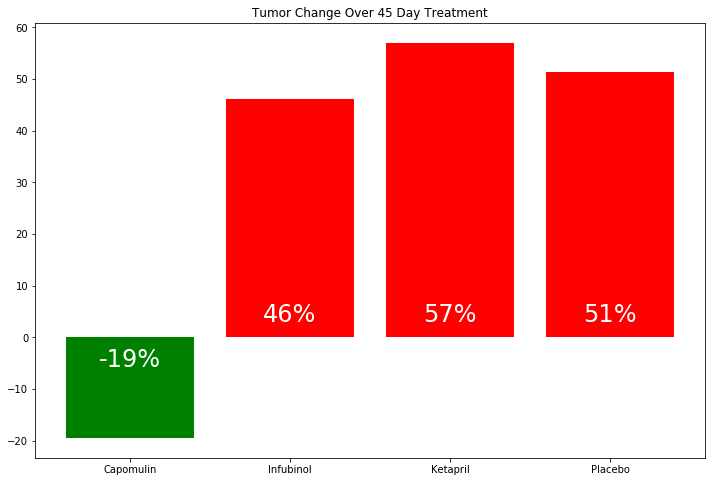

In [120]:
# Store all Relevant Percent Changes into a Tuple

colors = ['g' 
          if item[1]<0 
          else 'r' 
          for item in percent_change_ser.iteritems()]

percent = list(percent_change_ser.apply("{:.0f}".format)+'%')

plt.figure(figsize = [12, 8])
plt.bar(drugs, percent_change_ser, color = colors)

for i, value in enumerate(percent):
    if '-' in value:
        plt.text(s=value, x = i, y= -2, color="w",
                 verticalalignment="top", horizontalalignment="center", size=24)
    else:
        plt.text(s=value, x = i, y= 2, color="w",
                 verticalalignment="bottom", horizontalalignment="center", size=24)
plt.title('Tumor Change Over 45 Day Treatment')
plt.xticks(drugs)

    
# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.savefig('images/tumor_change.jpg')

# Show the Figure
plt.show()